In [1]:
import numpy as np

number_of_nodes = 1000
Average_degree = 4
Total = number_of_nodes*Average_degree
Upper_boundary = 100

probs = np.full(number_of_nodes, 1.0/np.float64(number_of_nodes), dtype=np.float64) # probabilities

N = 10000 # samples to test
for k in range(N):
    q = np.random.multinomial(Total, probs)
    t = np.where(q > Upper_boundary) # check for out-of boundaries
    if np.any(t):
        continue
        
np.mean(q)

4.0

In [2]:
import networkx as nx

G = nx.random_degree_sequence_graph(q)

In [3]:
[n for n in G.neighbors(26)]

[454, 772, 471, 404]

In [4]:
list_edgees = []
list = [v for v in G.degree()]
for i in range(0, len(list)):
    list_edgees.append(list[i][1])
    
np.mean(list_edgees)

4.0

In [5]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, font_weight='bold')
plt.draw()

C:\Users\kacsk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [6]:
import random
from nxsim import BaseNetworkAgent   

class Voter_model(BaseNetworkAgent):
    def __init__(self, environment=None, agent_id=None, state=()):
        super().__init__(environment=environment, agent_id=agent_id, state=state)
        self.convince_prob = 0.5

    def run(self):
        while True:
            self.id = random.randrange(number_of_nodes)
            self.convince()
            yield self.env.timeout(1)

    def convince(self):
        anty_neighbors = self.get_neighboring_agents(state_id=-self.state['id'])
        for neighbor in anty_neighbors:
            if neighbor.id in self.global_topology.neighbors(self.id):
                self.remove_edge(self.id, neighbor.id)
                
                for every_node in range(number_of_nodes):
                    new_edgee = random.randrange(number_of_nodes)
                    if new_edgee not in G.neighbors(self.id):
                        self.add_edge(self.id, new_edgee)
                        break
                        
                if random.random() < (1-self.convince_prob):               
                    self.state['id'] = neighbor.state['id']
                    #print(self.state['id'], neighbor.state['id'])
                else:
                    self.state['id'] = self.state['id']
                    #print(self.state['id'], neighbor.state['id'])
            break
        
    """          
    def convince2(self):           
        another_neighbors = self.get_neighboring_agents(state_id=1)
        for neighbor in another_neighbors:
            #print(neighbor.state['id'], self.convince_prob)
            
            if random.random() > (1-self.convince_prob):
                neighbor.state['id'] = -1
                #print(self.env.now, self.id, neighbor.id, neighbor.state['id'], sep='\t')
                break
    """
                
    def add_edge(self, agent_id1, agent_id2, edge_attr_dict=None, *edge_attrs):
        if agent_id1 in self.global_topology.nodes(data=False):
            if agent_id2 in self.global_topology.nodes(data=False):
                self.global_topology.add_edge(agent_id1, agent_id2, edge_attr_dict=edge_attr_dict, *edge_attrs)
            else:
                raise ValueError('\'agent_id2\'[{}] not in list of existing agents in the network'.format(agent_id2))
        else:
            raise ValueError('\'agent_id1\'[{}] not in list of existing agents in the network'.format(agent_id1))
            
    def remove_edge(self, agent_id1, agent_id2):
        self.global_topology.remove_edge(agent_id1, agent_id2)

In [7]:
from nxsim import NetworkSimulation

# Initialize agent states. Let's assume everyone is normal.
# Add keys as as necessary, but "id" must always refer to that state category

init_states = [{'id': 1} for _ in range(number_of_nodes)]

for i in range(len(init_states)):
    if random.random() < 0.5:
        init_states[i] = {'id': -1}

sim = NetworkSimulation(topology=G, states=init_states, agent_type=Voter_model,
                        max_time=1000, dir_path='sim_01', num_trials=1, logging_interval=1.0)

In [8]:
sim.run_simulation()

Starting simulations...
---Trial 0---
Setting up agents...
Written 1000 items to pickled binary file: sim_01\log.0.state.pickled
Simulation completed.


In [9]:
from nxsim import BaseLoggingAgent
trial = BaseLoggingAgent.open_trial_state_history(dir_path='sim_01', trial_id=0)

In [10]:
#trial

In [11]:
#trial.items()

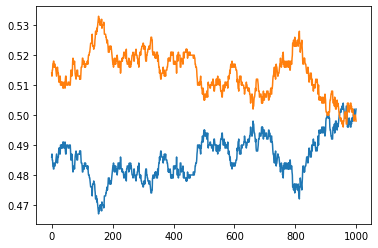

In [12]:
from matplotlib import pyplot as plt
ci_co_maja_1 = [sum([1 for node_id, state in g.items() if state['id'] == 1])/number_of_nodes for t,g in trial.items()]
ci_co_nie_maja_1 = [sum([1 for node_id, state in g.items() if state['id'] == -1])/number_of_nodes for t,g in trial.items()]

plt.plot(ci_co_maja_1)
plt.plot(ci_co_nie_maja_1)

plt.show()